In [1]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from PIL import Image
from evaluation import pix2pix_prompt_list

model_id = "timbrooks/instruct-pix2pix"
# model_id = "/DATA/DATANAS1/zhangyip/models/stable-diffusion-2-1-base"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [12]:
classes = [ ("backpack", "backpack"), ("backpack_dog", "backpack"),
("bear_plushie", "stuffed animal"), ("berry_bowl", "bowl"), 
("can", "can"), ("candle", "candle"), 
("cat", "cat"), ("cat2", "cat"),
("clock", "clock"), ("colorful_sneaker", "sneaker"),
("dog", "dog"), ("dog2", "dog"),
("dog3", "dog"), ("dog5", "dog"), ("dog6", "dog"),
("dog7", "dog"), ("dog8", "dog"),
("duck_toy", "toy"), ("fancy_boot", "boot"),
("grey_sloth_plushie", "stuffed animal"), ("monster_toy", "toy"),
("pink_sunglasses", "glasses"), ("poop_emoji", "toy"),
("rc_car", "toy"), ("red_cartoon", "cartoon"),
("robot_toy", "toy"), ("shiny_sneaker", "sneaker"),
("teapot", "teapot"), ("vase", "vase"),
("wolf_plushie", "stuffed animal")]
name, prompt_class = classes[16]
unique_token = name+ "</w>"
class_token = prompt_class
mode_list = ["object", "live"]
eval_mode = mode_list[0]
prompt_list = pix2pix_prompt_list("", class_token, mode = eval_mode)
print(name)

dog8


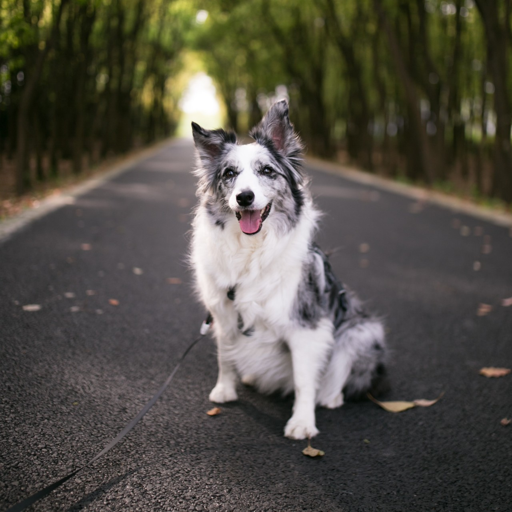

In [13]:
image = Image.open("/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data/" + name +"/01.jpg").resize( (512,512) )
image
# `image` is an RGB PIL.Image

make the dog play with a butterfly in the flowers


  0%|          | 0/50 [00:00<?, ?it/s]

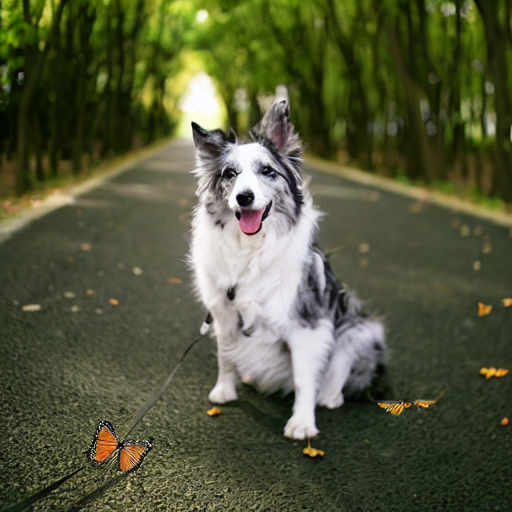

In [14]:
prompt = "make the " + prompt_class + " play with a butterfly in the flowers"
print(prompt)
images = pipe(prompt, image=image, num_inference_steps=50).images
images[0]

make the dog run beside an airplane


  0%|          | 0/50 [00:00<?, ?it/s]

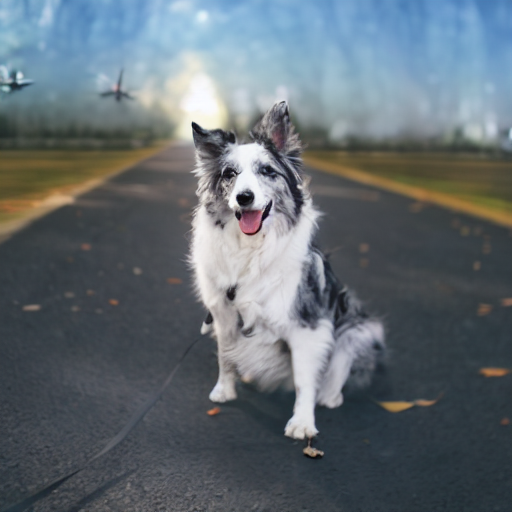

In [15]:
prompt = "make the " + prompt_class + " run beside an airplane"
print(prompt)
images = pipe(prompt, image=image, num_inference_steps=50).images
images[0]